In [2]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import time
from statistics import mean

In [6]:
def random_grid_graph_with_obstacle(graph_height: int, graph_width: int, obstacles_count: int) -> nx.Graph:

    if obstacles_count > graph_width * graph_height:
        raise ValueError("obstacles_count must be bigger than production of graph_width and graph_height")

    result = nx.grid_2d_graph(graph_height, graph_width)
    all_positions = set([(i, j) for i in range(graph_height) for j in range(graph_width)])

    nodes = list(result.nodes)

    for _ in range(obstacles_count):
        chosen_node = random.choice(nodes)

        result.remove_node(chosen_node)

        nodes = list(result.nodes)

    not_connected = set(nodes) - set([elem for elem in list(nx.connected_components(result))[0]])

    for elem in not_connected:
        result.remove_node(elem)

    possible_places = all_positions - set(nodes) - not_connected

    for _ in range(len(not_connected)):
        for elem in possible_places:

            if (elem[0] + 1, elem[1]) in nodes:
                result.add_node(elem)

                result.add_edge(elem, (elem[0] + 1, elem[1]))

                if (elem[0], elem[1] + 1) in nodes:
                    result.add_edge(elem, (elem[0], elem[1] + 1))
                elif (elem[0] - 1, elem[1]) in nodes:
                    result.add_edge(elem, (elem[0] - 1, elem[1]))
                elif (elem[0], elem[1] - 1) in nodes:
                    result.add_edge(elem, (elem[0], elem[1] - 1))

                possible_places.remove(elem)

                break
            elif (elem[0], elem[1] + 1) in nodes:
                result.add_node(elem)

                result.add_edge(elem, (elem[0], elem[1] + 1))

                if (elem[0] + 1, elem[1]) in nodes:
                    result.add_edge(elem, (elem[0] + 1, elem[1]))
                elif (elem[0] - 1, elem[1]) in nodes:
                    result.add_edge(elem, (elem[0] - 1, elem[1]))
                elif (elem[0], elem[1] - 1) in nodes:
                    result.add_edge(elem, (elem[0], elem[1] - 1))

                possible_places.remove(elem)

                break
            elif (elem[0] - 1, elem[1]) in nodes:
                result.add_node(elem)

                result.add_edge(elem, (elem[0] - 1, elem[1]))

                if (elem[0], elem[1] + 1) in nodes:
                    result.add_edge(elem, (elem[0], elem[1] + 1))
                elif (elem[0] + 1, elem[1]) in nodes:
                    result.add_edge(elem, (elem[0] + 1, elem[1]))
                elif (elem[0], elem[1] - 1) in nodes:
                    result.add_edge(elem, (elem[0], elem[1] - 1))

                possible_places.remove(elem)

                break
            elif (elem[0], elem[1] - 1) in nodes:
                result.add_node(elem)

                result.add_edge(elem, (elem[0], elem[1] - 1))

                if (elem[0], elem[1] + 1) in nodes:
                    result.add_edge(elem, (elem[0], elem[1] + 1))
                elif (elem[0] - 1, elem[1]) in nodes:
                    result.add_edge(elem, (elem[0] - 1, elem[1]))
                elif (elem[0] + 1, elem[1]) in nodes:
                    result.add_edge(elem, (elem[0] + 1, elem[1]))

                possible_places.remove(elem)

                break

    return result

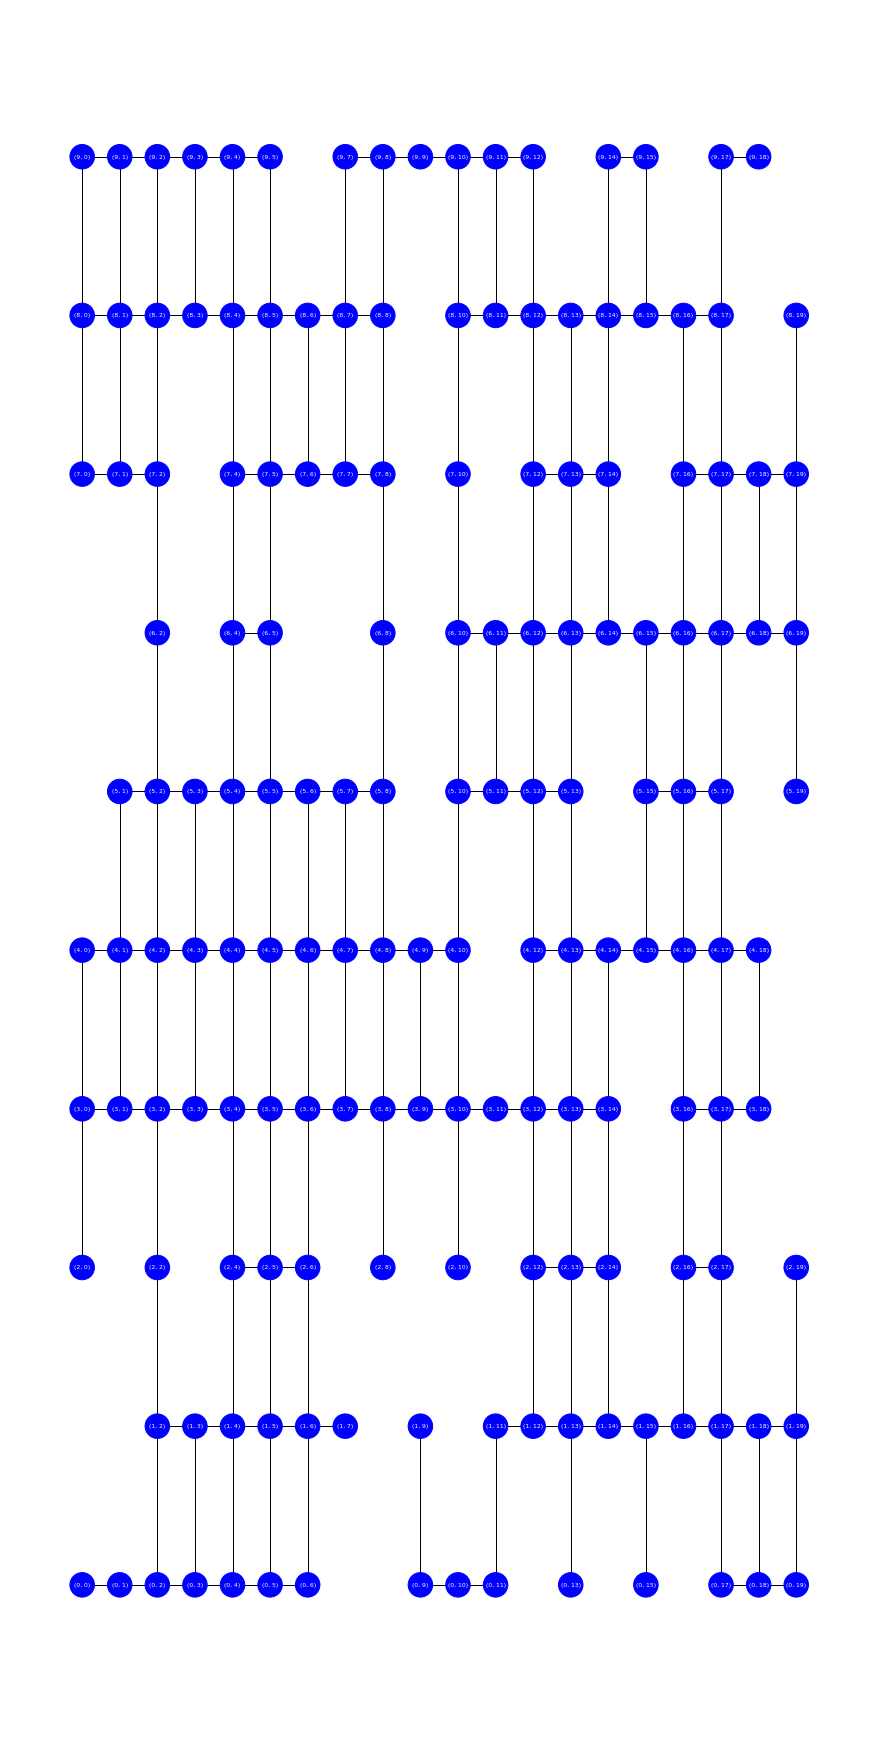

In [7]:
# Initializing function params
my_graph_height = 10
my_graph_width = 20
my_graph_walls = 40

# Generating graph
my_graph = random_grid_graph_with_obstacle(my_graph_height, my_graph_width, my_graph_walls)

# Plot graph
plt.figure(figsize=(my_graph_height * 1.2, my_graph_width * 1.2))
pos = {(x, y): (y, x) for x, y in my_graph.nodes()}
nx.draw(my_graph, pos=pos, with_labels=True, font_size=6, font_color='white', node_size=600,
        node_color=['blue' for _ in my_graph.nodes()])
plt.show()

Experiment 1
Start: (7, 10)
Destination: (6, 10)
Time: 0.00012191700000130368



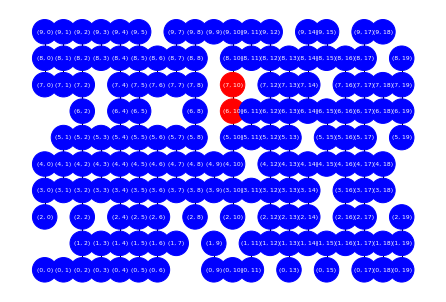

Experiment 2
Start: (1, 4)
Destination: (7, 16)
Time: 0.00044566699989445624



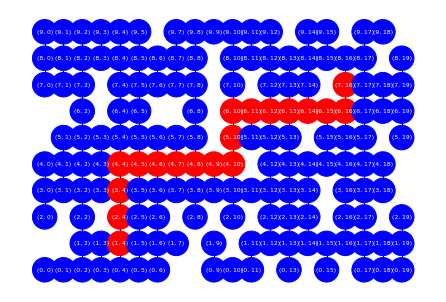

Experiment 3
Start: (6, 17)
Destination: (3, 6)
Time: 0.0003305410000393749



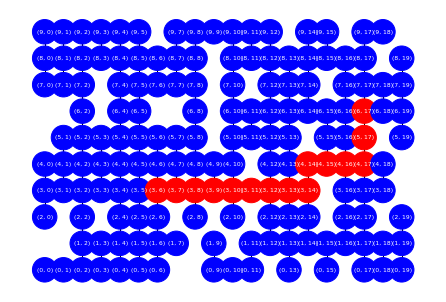

Experiment 4
Start: (3, 3)
Destination: (5, 4)
Time: 7.620900009897014e-05



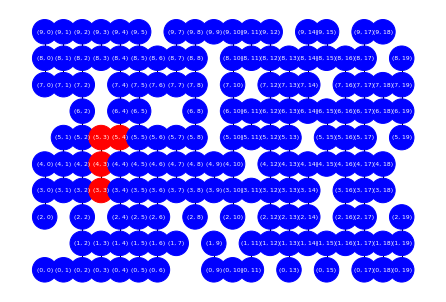

Experiment 5
Start: (1, 15)
Destination: (6, 17)
Time: 0.0001665830000092683



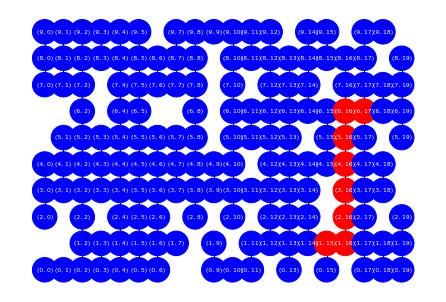

Mean time: 0.00022818340000867464


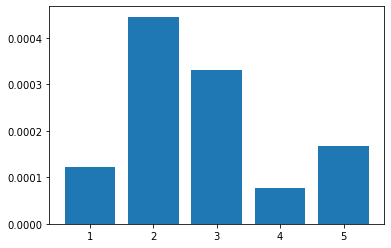

In [11]:
# Using A* algorithm for 5 times and plot results
times = []

for exp in range(5):
    start_point = random.choice(list(my_graph.nodes()))
    end_point = random.choice(list(my_graph.nodes()))

    while end_point == start_point:
        end_point = random.choice(list(my_graph.nodes()))

    start_time = time.perf_counter()
    found_path = nx.algorithms.astar_path(my_graph, start_point, end_point)
    end_time = time.perf_counter()

    times.append(end_time - start_time)

    color_map = []

    for node in my_graph.nodes():
        if node in found_path:
            color_map.append('red')
        else:
            color_map.append('blue')

    print("Experiment " + str(exp + 1))
    print("Start:", start_point)
    print("Destination:", end_point)
    print("Time:", end_time - start_time)
    print()

#     plt.figure(figsize=(my_graph_height * 1.2, my_graph_width * 1.2))
    pos = {(x, y): (y, x) for x, y in my_graph.nodes()}
    nx.draw(my_graph, pos=pos, with_labels=True, font_size=6, font_color='white', node_size=600, node_color=color_map)
    plt.show()

# Mean results
print("Mean time:", mean(times))
plt.bar([1, 2, 3, 4, 5], times)
plt.show()